<a href="https://colab.research.google.com/github/trishas2022/lungs/blob/main/lungs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
# Output: 2.0.0

2.3.1


In [ ]:
# Specify path to training, validation, and testing data
train_path = 'C:/Users/Kuntal/Desktop/DL/Lungs/lung_colon_image_set/lung_image_sets/out/train'
val_path = 'C:/Users/Kuntal/Desktop/DL/Lungs/lung_colon_image_set/lung_image_sets/out/val'
test_path = 'C:/Users/Kuntal/Desktop/DL/Lungs/lung_colon_image_set/lung_image_sets/out/test'
print(train_path)

C:/Users/Kuntal/Desktop/DL/Lungs/lung_colon_image_set/lung_image_sets/out/train


In [ ]:
train_datagen = ImageDataGenerator(rescale=1)#/255) 
val_datagen = ImageDataGenerator(rescale=1)#/255)
test_datagen = ImageDataGenerator(rescale=1)#/255)


target_size = (224, 224) #(256,256)

# Prepare batches of data for training
train_data_gen = train_datagen.flow_from_directory(train_path,
                                               target_size=target_size,
                                               batch_size=40,
                                               class_mode='binary')

# Prepare batches of data for validation
val_data_gen = val_datagen.flow_from_directory(val_path,
                                               target_size=target_size,
                                               batch_size=20,
                                               class_mode='binary',
                                               shuffle=False)
# Prepare batches of data for testing on unknown samples (not used for training/validation)
test_data_gen = test_datagen.flow_from_directory(test_path,
                                               target_size=target_size,
                                               batch_size=20,
                                               class_mode='binary',
                                               shuffle=False)

Found 5739 images belonging to 2 classes.
Found 716 images belonging to 2 classes.
Found 720 images belonging to 2 classes.


(40, 7, 7, 1280)


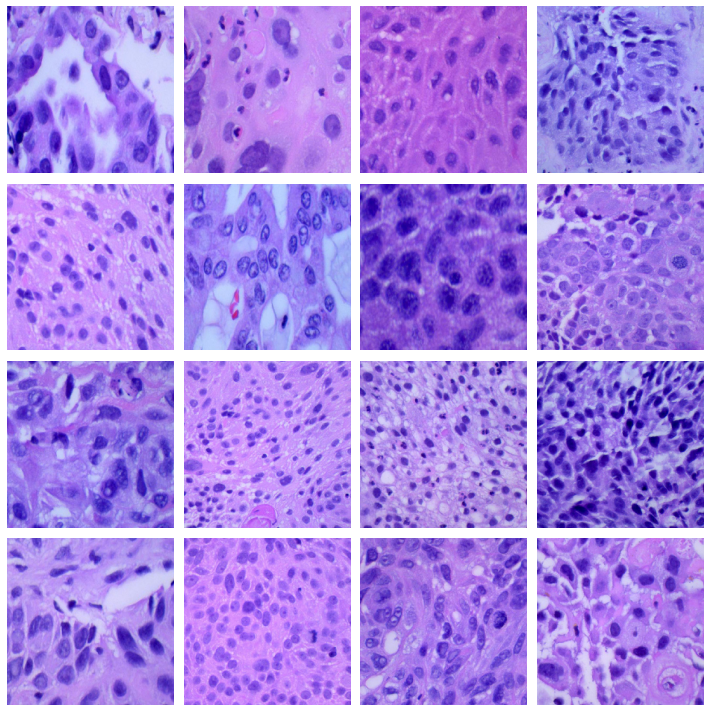

In [ ]:
# The next function returns a batch from the training dataset. We use image data and discard the labels.
sample_training_images, _ = next(train_data_gen)
input_shape = (224, 224, 3) # (256,256,3)
base_model = tf.keras.applications.MobileNetV2(input_shape, alpha=0.5,
                                               include_top=False,
                                               weights='imagenet')
feature_batch = base_model(sample_training_images)
print(feature_batch.shape)

# This function will plot images in the form of a grid with 4 rows and 4 columns 
def plotImages(images_arr):
    fig, axes = plt.subplots(4, 4, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Plot 16 random images from training data    
plotImages(sample_training_images[:16]/255.0)


In [ ]:
# Build your CNN model

input_shape = (224, 224, 3) # (256,256,3)

model = Sequential()

# Add convolutional/pooling layers

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=input_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=input_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=input_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add flatten layer
model.add(Flatten())

# Add dense/dropout layers + activation functions

model.add(Dense(128))
model.add(Activation('relu'))# relu activation function for deep layer
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))# sigmoid activation function for last layer for binary classification

# Print summary of your model
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape, alpha=0.5,
                                               include_top=False,
                                               weights='imagenet')
base_model.summary() 

print(feature_batch.shape)
base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

Model: "mobilenetv2_0.50_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 16) 432         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 16) 64          Conv1[0][0]                      
_______________________________________________________________________________

In [ ]:
#for layer in base_model.layers[:]:
#  layer.trainable = False

#print((base_model.layers[:]))

count = 0
for layer in base_model.layers:
    if count < 144:
      layer.trainable = False
    print(layer, layer.trainable, count)
    count = count+1


<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001CDA6146400> False 0
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x000001CDBBB461F0> False 1
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CDBCA96F40> False 2
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001CDAFB779D0> False 3
<tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000001CDBBBA53D0> False 4
<tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x000001CDBCAC1280> False 5
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001CDBBC4E7C0> False 6
<tensorflow.python.keras.layers.advanced_activations.ReLU object at 0x000001CDBBC4E880> False 7
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001CDBBC74B20> False 8
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x000001CDBBC7A400> False 9
<tensorflow.pytho

In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(40, 1)


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=True)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs, outputs)
model.summary() 

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_0.50_224 (Functi (None, 7, 7, 1280)        706224    
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)             

In [ ]:
# Compile and train (fit) your model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 80
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=140,# number of images divided by batch size
                              epochs=epochs,
                              validation_data=val_data_gen,
                              validation_steps=35)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/80
140/140 [==============================] - 66s 472ms/step - loss: 1.7446 - accuracy: 0.8593 - val_loss: 1.0797 - val_accuracy: 0.9186
Epoch 2/80
140/140 [==============================] - 64s 461ms/step - loss: 1.5066 - accuracy: 0.8899 - val_loss: 0.9487 - val_accuracy: 0.9329
Epoch 3/80
140/140 [==============================] - 64s 460ms/step - loss: 2.6086 - accuracy: 0.8181 - val_loss: 3.3144 - val_accuracy: 0.7700
Epoch 4/80
140/140 [==============================] - 65s 463ms/step - loss: 1.7909 - accuracy: 0.8763 - val_loss: 0.9741 - val_accuracy: 0.9314
Epoch 5/80
140/140 [==============================] - 64s 457ms/step - loss: 2.6661 - accuracy: 0.8195 - val_loss: 6.7107 - val_accuracy: 0.5586
Epoch 6/80
140/140 [==============================] - 64s 458ms/step - loss: 5.5021 - accuracy: 0.6356 - val_loss: 2.7371 - val_accuracy: 0.8157
Epoch 7/80
140/140 [==============================] - 

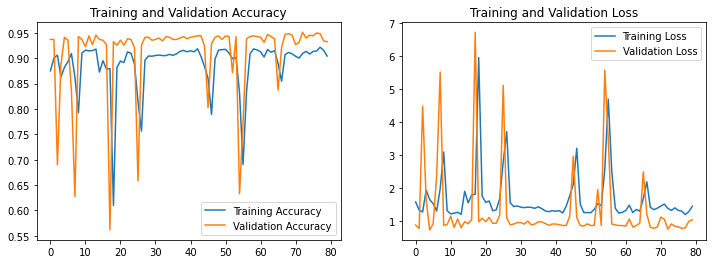

In [ ]:
# Plot model accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Test your model on unknown samples (testing data)
test_loss, test_acc = model.evaluate_generator(test_data_gen, steps=35)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Instructions for updating:
Please use Model.evaluate, which supports generators.
Test accuracy: 0.9085714221000671
Test loss: 1.3954938650131226
